SER and BER graph for M = {s1(A,0); s2(0,A)}

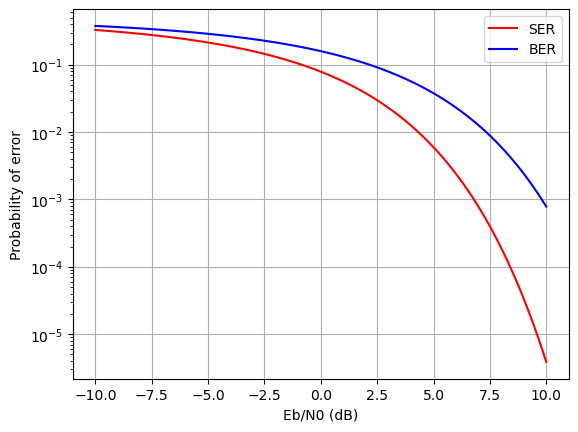

Mức công suất Eb/N0 tối thiểu để P(e) đạt ngưỡng 0.01 với SER: 15.30392399499906 dB
Mức công suất Eb/N0 tối thiểu để P(e) đạt ngưỡng 0.01 với BER: 30.60784798999812 dB


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Hàm tính xác suất lỗi Pe
def calculate_error_probability(Eb_N0, is_ser):
    return 0.5 * erfc(np.sqrt(Eb_N0)) if is_ser else 0.5 * erfc(np.sqrt(Eb_N0 / 2))

# Hàm vẽ đồ thị hàm xác suất lỗi Pe
def plot_error_probability(Eb_N0_db, Pe_ser, Pe_ber):
    plt.figure()
    plt.semilogy(Eb_N0_db, Pe_ser, 'r', label='SER')
    plt.semilogy(Eb_N0_db, Pe_ber, 'b', label='BER')
    plt.xlabel('Eb/N0 (dB)')
    plt.ylabel('Probability of error')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Hàm tính xác suất lỗi ứng với từng giá trị Eb/N0
def calculate_error_probabilities(Eb_N0_db):
    Eb_N0 = 10 ** (Eb_N0_db / 10.0)
    Pe_ser = calculate_error_probability(Eb_N0, True)
    Pe_ber = calculate_error_probability(Eb_N0, False)
    return Pe_ser, Pe_ber

# Hàm tính mức công suất Eb/N0 tối thiểu để P(e) đạt được một ngưỡng nhất định
def calculate_minimum_Eb_N0(Pe_threshold, is_ser):
    return (np.log(0.5) - np.log(Pe_threshold)) ** 2 if is_ser else 2 * (np.log(0.5) - np.log(Pe_threshold)) ** 2

# Giá trị Eb/N0 từ -10 dB đến 10 dB
Eb_N0_db = np.linspace(-10, 10, 100)

# Tính xác suất lỗi ứng với từng giá trị Eb/N0
Pe_ser, Pe_ber = calculate_error_probabilities(Eb_N0_db)

# Vẽ đồ thị hàm xác suất lỗi Pe
plot_error_probability(Eb_N0_db, Pe_ser, Pe_ber)

# Tính mức công suất Eb/N0 tối thiểu để P(e) đạt được một ngưỡng nhất định
Pe_threshold = 0.01
minimum_Eb_N0_ser = calculate_minimum_Eb_N0(Pe_threshold, True)
minimum_Eb_N0_ber = calculate_minimum_Eb_N0(Pe_threshold, False)

print(f'Mức công suất Eb/N0 tối thiểu để P(e) đạt ngưỡng {Pe_threshold} với SER: {minimum_Eb_N0_ser} dB')
print(f'Mức công suất Eb/N0 tối thiểu để P(e) đạt ngưỡng {Pe_threshold} với BER: {minimum_Eb_N0_ber} dB')


BER for bipolar, 4psk

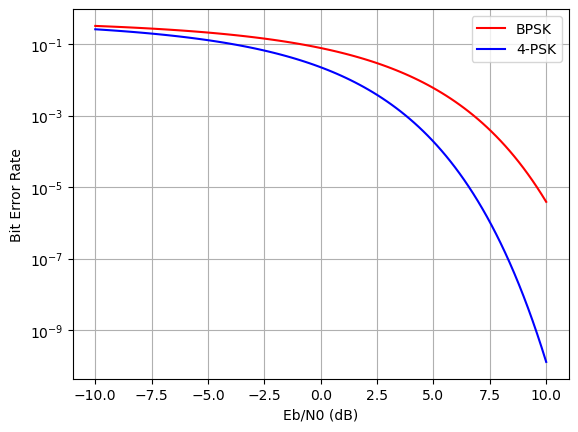

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Hàm tính BER cho BPSK
def calculate_ber_bpsk(Eb_N0):
    return 0.5 * erfc(np.sqrt(Eb_N0))

# Hàm tính BER cho 4-PSK
def calculate_ber_4psk(Eb_N0):
    return erfc(np.sqrt(2 * Eb_N0)) / 2

# Tính BER cho từng giá trị Eb/N0
Eb_N0_db = np.linspace(-10, 10, 100)
Eb_N0 = 10 ** (Eb_N0_db / 10.0)
ber_bpsk = calculate_ber_bpsk(Eb_N0)
ber_4psk = calculate_ber_4psk(Eb_N0)

# Vẽ đồ thị BER
plt.figure()
plt.semilogy(Eb_N0_db, ber_bpsk, 'r', label='BPSK')
plt.semilogy(Eb_N0_db, ber_4psk, 'b', label='4-PSK')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Rate')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()